In [39]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from Bio import Seq
%matplotlib inline
from tcraligner.alignment_functions import HashedAln

### 1. Mismatch generation

In [78]:
def generate_mismatches(ref_string_length, num_mismatches=1, num_desired_seq=10):

    ref_seqs = []
    returned_strings = []
    for i in range(num_desired_seq):
        choices = ['A','C','G','T']
        ref_list = np.random.choice(choices, ref_string_length)
        ref_seqs.append(''.join(ref_list))
        mut_pos = np.random.choice(len(ref_list), num_mismatches, replace=False)
        new_list = ref_list.copy()
    
        for j in mut_pos:
            choices = ['A','C','G','T']
            choices.remove(new_list[j])
            new_list[j] = np.random.choice(choices)
        new_string = ''.join(new_list)
        returned_strings.append(new_string)
    clones = pd.DataFrame({'ref_seq': ref_seqs, 'query_seq': returned_strings})
    return clones

In [ ]:
def generate_aa_mismatches(ref_string_length, num_mismatches=1, num_desired_seq=10):

    ref_seqs = []
    returned_strings = []
    for i in range(num_desired_seq):
        choices = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']

        ref_list = np.random.choice(choices, ref_string_length)
        ref_seqs.append(''.join(ref_list))
        mut_pos = np.random.choice(len(ref_list), num_mismatches, replace=False)
        new_list = ref_list.copy()
    
        for j in mut_pos:
            choices = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
            choices.remove(new_list[j])
            new_list[j] = np.random.choice(choices)
        new_string = ''.join(new_list)
        returned_strings.append(new_string)
    clones = pd.DataFrame({'ref_seq': ref_seqs, 'query_seq': returned_strings})
    return clones

### Number of query seq 100, with varied string length and number of mismatches

In [74]:
# Generate strings of length 5
len5_mis1 = generate_mismatches(5, 1, 500)
len5_mis2 = generate_mismatches(5, 2, 500)
len5_mis3 = generate_mismatches(5, 3, 500)

In [137]:
# Generate strings of length 10

len10_mis1 = generate_mismatches(10, 1, 500)
len10_mis2 = generate_mismatches(10, 2, 500)
len10_mis3 = generate_mismatches(10, 3, 500)

# Generate strings of length 20

len20_mis1 = generate_mismatches(20, 1, 500)
len20_mis2 = generate_mismatches(20, 2, 500)
len20_mis3 = generate_mismatches(20, 3, 500)


# Generate strings of length 40
# ref_list40 = np.random.choice(choices, 40)
# ref_string40 = ''.join(ref_list40)
# print(ref_string40)
len40_mis0 = generate_mismatches(40, 0, 500)
len40_mis1 = generate_mismatches(40, 1, 500)
len40_mis2 = generate_mismatches(40, 2, 500)
len40_mis3 = generate_mismatches(40, 3, 500)
len40_mis4 = generate_mismatches(40, 4, 500)
len40_mis8 = generate_mismatches(40, 8, 500)
len40_mis16 = generate_mismatches(40, 16, 500)
len40_mis32 = generate_mismatches(40, 32, 500)
# Generate strings of length 80

len80_mis0 = generate_mismatches(80, 0, 500)
len80_mis1 = generate_mismatches(80, 1, 500)
len80_mis2 = generate_mismatches(80, 2, 500)
len80_mis3 = generate_mismatches(80, 3, 500)
len80_mis4 = generate_mismatches(80, 4, 500)
len80_mis8 = generate_mismatches(80, 8, 500)

### Generating same mismatches for amino acids

In [133]:
def calculate_time(df, translate = False, kmer_size = 3):
    if translate == True:
        ref_aa = [Seq.translate(i) for i in df.ref_seq]
        query_aa = [Seq.translate(j) for j in df.query_seq]
        alnr = HashedAln(ref_aa, df.index, kmer_size)
        alnr.build_index()
        start = time.time()
        res = alnr.align_clones(query_aa)
        runtime = time.time()-start
    else:
        alnr = HashedAln(df.ref_seq, df.index, kmer_size)
        alnr.build_index()
        start = time.time()
        res = alnr.align_clones(df.query_seq)
        runtime = time.time()-start
    
    return runtime

In [93]:
def pairwise_time(df):
    alnr = HashedAln(df.ref_seq, df.index, 3)
    alnr.build_index()
    start = time.time()
    res = alnr._align_clones_pairwise(df.query_seq)
    runtime = time.time()-start
    return runtime

#### Mismatch 1, differing length and kmer size

Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 

([<matplotlib.axis.XTick at 0x7f93105d5160>,
 [Text(0, 0, '5'),
  Text(1, 0, '10'),
  Text(2, 0, '20'),
  Text(3, 0, '40'),
  Text(4, 0, '80'),
  Text(5, 0, '160')])

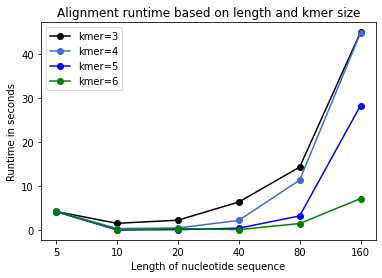

In [139]:
### Kmer with differing length
len160_mis1 = generate_mismatches(160, 1, 500)
 
kmer3_length = pd.DataFrame(columns = ['query_pattern', 'time_s'])
kmer3_length.loc[0] = 'length_5', calculate_time(len5_mis1, kmer_size=3)
kmer3_length.loc[1] = 'length_10', calculate_time(len10_mis1, kmer_size=3)
kmer3_length.loc[2] = 'length_20', calculate_time(len20_mis1, kmer_size=3)
kmer3_length.loc[3] = 'length_40', calculate_time(len40_mis1, kmer_size=3)
kmer3_length.loc[4] = 'length_80', calculate_time(len80_mis1, kmer_size=3)
kmer3_length.loc[5] = 'length_160', calculate_time(len160_mis1, kmer_size=3)

kmer4_length = pd.DataFrame(columns = ['query_pattern', 'time_s'])
kmer4_length.loc[0] = 'length_5', calculate_time(len5_mis1, kmer_size=4)
kmer4_length.loc[1] = 'length_10', calculate_time(len10_mis1, kmer_size=4)
kmer4_length.loc[2] = 'length_20', calculate_time(len20_mis1, kmer_size=4)
kmer4_length.loc[3] = 'length_40', calculate_time(len40_mis1, kmer_size=4)
kmer4_length.loc[4] = 'length_80', calculate_time(len80_mis1, kmer_size=4)
kmer4_length.loc[5] = 'length_160', calculate_time(len160_mis1, kmer_size=4)

kmer5_length = pd.DataFrame(columns = ['query_pattern', 'time_s'])
kmer5_length.loc[0] = 'length_5', calculate_time(len5_mis1, kmer_size=5)
kmer5_length.loc[1] = 'length_10', calculate_time(len10_mis1, kmer_size=5)
kmer5_length.loc[2] = 'length_20', calculate_time(len20_mis1, kmer_size=5)
kmer5_length.loc[3] = 'length_40', calculate_time(len40_mis1, kmer_size=5)
kmer5_length.loc[4] = 'length_80', calculate_time(len80_mis1, kmer_size=5)
kmer5_length.loc[5] = 'length_160', calculate_time(len160_mis1, kmer_size=5)

kmer6_length = pd.DataFrame(columns = ['query_pattern', 'time_s'])
kmer6_length.loc[0] = 'length_5', calculate_time(len5_mis1, kmer_size=6)
kmer6_length.loc[1] = 'length_10', calculate_time(len10_mis1, kmer_size=6)
kmer6_length.loc[2] = 'length_20', calculate_time(len20_mis1, kmer_size=6)
kmer6_length.loc[3] = 'length_40', calculate_time(len40_mis1, kmer_size=6)
kmer6_length.loc[4] = 'length_80', calculate_time(len80_mis1, kmer_size=6)
kmer6_length.loc[5] = 'length_160', calculate_time(len160_mis1, kmer_size=6)


plt.plot(kmer3_length.time_s, marker = 'o', color = 'black', label = 'kmer=3')
plt.plot(kmer4_length.time_s, marker = 'o', color = 'royalblue', label = 'kmer=4')
plt.plot(kmer5_length.time_s, marker = 'o', color = 'blue', label = 'kmer=5')
plt.plot(kmer6_length.time_s, marker = 'o', color = 'green', label = 'kmer=6')
plt.legend()
plt.xlabel('Length of nucleotide sequence')
plt.ylabel('Runtime in seconds')
plt.title('Alignment runtime based on length and kmer size')
plt.xticks([0,1,2,3,4,5], labels=[5,10,20,40,80,160])

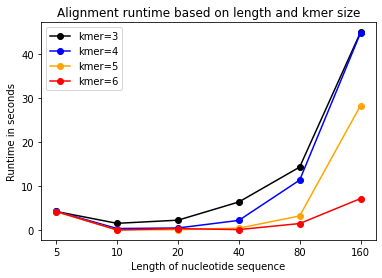

In [140]:
plt.plot(kmer3_length.time_s, marker = 'o', color = 'black', label = 'kmer=3')
plt.plot(kmer4_length.time_s, marker = 'o', color = 'blue', label = 'kmer=4')
plt.plot(kmer5_length.time_s, marker = 'o', color = 'orange', label = 'kmer=5')
plt.plot(kmer6_length.time_s, marker = 'o', color = 'red', label = 'kmer=6')
plt.legend()
plt.xlabel('Length of nucleotide sequence')
plt.ylabel('Runtime in seconds')
plt.title('Alignment runtime based on length and kmer size')
plt.xticks([0,1,2,3,4,5], labels=[5,10,20,40,80,160])
#plt.savefig('./length_variation+kmersize.png', bbox_inches='tight')

#### Mismatch 1, Differing length

Text(0.5, 1.0, 'Pairwise Alignment of sequences of different length')

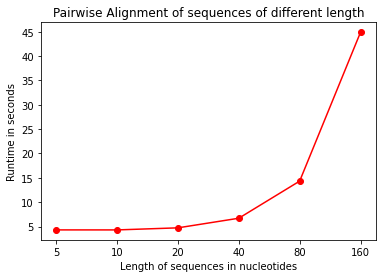

In [95]:
# Pairwise###
len160_mis1 = generate_mismatches(160, 1, 500)


pairwise_length = pd.DataFrame(columns = ['query_pattern', 'time_s'])
pairwise_length.loc[0] = 'length_5', pairwise_time(len5_mis1)
pairwise_length.loc[1] = 'length_10', pairwise_time(len10_mis1)
pairwise_length.loc[2] = 'length_20', pairwise_time(len20_mis1)
pairwise_length.loc[3] = 'length_40', pairwise_time(len40_mis1)
pairwise_length.loc[4] = 'length_80', pairwise_time(len80_mis1)
pairwise_length.loc[5] = 'length_160', pairwise_time(len160_mis1)
plt.plot(pairwise_length.time_s, marker = 'o', color = 'red')
plt.xticks([0,1,2,3,4,5], labels=[5,10,20,40,80,160])
plt.xlabel('Length of sequences in nucleotides')
plt.ylabel('Runtime in seconds')
plt.title('Pairwise Alignment of sequences of different length')

#### Differing number of clones (size)


In [97]:
len20_mis1_500 = generate_mismatches(20, 1, 500)
len20_mis1_1000 = generate_mismatches(20, 1, 1000)
len20_mis1_2000 = generate_mismatches(20, 1, 2000)
len20_mis1_3000 = generate_mismatches(20, 1, 3000)
len20_mis1_4000 = generate_mismatches(20, 1, 4000)
len20_mis1_5000 = generate_mismatches(20, 1, 5000)


In [ ]:
pairwise_size = pd.DataFrame(columns = ['query_pattern', 'time_s'])
pairwise_size.loc[0] = 'length_5', pairwise_time(len20_mis1_500)
pairwise_size.loc[1] = 'length_10', pairwise_time(len20_mis1_1000)
pairwise_size.loc[2] = 'length_20', pairwise_time(len20_mis1_2000)
pairwise_size.loc[3] = 'length_40', pairwise_time(len20_mis1_3000)
pairwise_size.loc[4] = 'length_80', pairwise_time(len20_mis1_4000)
pairwise_size.loc[5] = 'length_160', pairwise_time(len20_mis1_5000)
plt.plot(pairwise_size.time_s, marker = 'o', color = 'red')
plt.xticks([0,1,2,3,4,5], labels=[500,1000,2000,3000,4000,5000])
plt.xlabel('Number of clones')
plt.ylabel('Runtime in seconds')
plt.title('Pairwise Alignment of clones of different size')

In [ ]:
hash_size = pd.DataFrame(columns = ['query_pattern', 'time_s'])
hash_size.loc[0] = 'length_5', calculate_time(len20_mis1_500)
hash_size.loc[1] = 'length_10', calculate_time(len20_mis1_1000)
hash_size.loc[2] = 'length_20', calculate_time(len20_mis1_2000)
hash_size.loc[3] = 'length_40', calculate_time(len20_mis1_3000)
hash_size.loc[4] = 'length_80', calculate_time(len20_mis1_4000)
hash_size.loc[5] = 'length_160', calculate_time(len20_mis1_5000)
plt.plot(hash_size.time_s, marker = 'o', color = 'blue')
plt.xticks([0,1,2,3,4,5], labels=[500,1000,2000,3000,4000,5000])
plt.xlabel('Number of clones')
plt.ylabel('Runtime in seconds')
plt.title('Pairwise Alignment of clones of different size')

### Amino Acid sequence


In [124]:
aa_len5_mis1 = generate_aa_mismatches(5, 1, 500)
aa_len10_mis1 = generate_aa_mismatches(10, 1, 500)
aa_len20_mis1 = generate_aa_mismatches(20, 1, 500)
aa_len40_mis1 = generate_aa_mismatches(40, 1, 500)
aa_len80_mis1 = generate_aa_mismatches(80, 1, 500)
aa_len160_mis1 = generate_aa_mismatches(160, 1, 500)

In [145]:
results_df = pd.DataFrame(columns = ['length', 'time_s'])
results_df.loc[0] = 'length_5', calculate_time(len5_mis1, False)
results_df.loc[1] = 'length_10', calculate_time(len10_mis1, False)
results_df.loc[2] = 'length_20', calculate_time(len20_mis1, False)
results_df.loc[3] = 'length_40', calculate_time(len40_mis1, False)
results_df.loc[4] = 'length_80', calculate_time(len80_mis1, False)
results_df.loc[5] = 'length_160', calculate_time(len160_mis1, False)

Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done


In [146]:
hash_aa = pd.DataFrame(columns = ['length', 'time_s'])
hash_aa.loc[0] = 'length_5', calculate_time(aa_len5_mis1, False)
hash_aa.loc[1] = 'length_10', calculate_time(aa_len10_mis1, False)
hash_aa.loc[2] = 'length_20', calculate_time(aa_len20_mis1, False)
hash_aa.loc[3] = 'length_40', calculate_time(aa_len40_mis1, False)
hash_aa.loc[4] = 'length_80', calculate_time(aa_len80_mis1, False)
hash_aa.loc[5] = 'length_160', calculate_time(aa_len160_mis1, False)

Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done


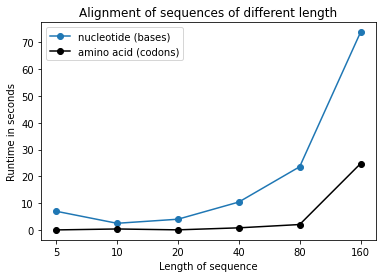

In [147]:
plt.plot(results_df.time_s, marker = 'o', label = 'nucleotide (bases)')
plt.xticks([0,1,2,3,4,5], labels=[5,10,20,40,80,160])
plt.xlabel('Length of sequence')
plt.ylabel('Runtime in seconds')
plt.title('Alignment of sequences of different length')
plt.plot(hash_aa.time_s, marker = 'o', color = 'black', label = 'amino acid (codons)')
plt.legend()
#plt.savefig('./length_variation.png', bbox_inches='tight')

#### Clone number

In [143]:
kmer3_size = pd.DataFrame(columns = ['query_pattern', 'time_s'])
kmer3_size.loc[0] = 'length_5', calculate_time(len20_mis1_500, kmer_size=3)
kmer3_size.loc[1] = 'length_10', calculate_time(len20_mis1_1000, kmer_size=3)
kmer3_size.loc[2] = 'length_20', calculate_time(len20_mis1_2000, kmer_size=3)
kmer3_size.loc[3] = 'length_40', calculate_time(len20_mis1_3000, kmer_size=3)
kmer3_size.loc[4] = 'length_80', calculate_time(len20_mis1_4000, kmer_size=3)
kmer3_size.loc[5] = 'length_160', calculate_time(len20_mis1_5000, kmer_size=3)

kmer4_size = pd.DataFrame(columns=['pattern', 'time_s'])
kmer4_size.loc[0] = 'length_5', calculate_time(len20_mis1_500, kmer_size=4)
kmer4_size.loc[1] = 'length_10', calculate_time(len20_mis1_1000, kmer_size=4)
kmer4_size.loc[2] = 'length_20', calculate_time(len20_mis1_2000, kmer_size=4)
kmer4_size.loc[3] = 'length_40', calculate_time(len20_mis1_3000, kmer_size=4)
kmer4_size.loc[4] = 'length_80', calculate_time(len20_mis1_4000, kmer_size=4)
kmer4_size.loc[5] = 'length_160', calculate_time(len20_mis1_5000, kmer_size=4)

kmer5_size = pd.DataFrame(columns=['pattern', 'time_s'])
kmer5_size.loc[0] = 'length_5', calculate_time(len20_mis1_500, kmer_size=5)
kmer5_size.loc[1] = 'length_10', calculate_time(len20_mis1_1000, kmer_size=5)
kmer5_size.loc[2] = 'length_20', calculate_time(len20_mis1_2000, kmer_size=5)
kmer5_size.loc[3] = 'length_40', calculate_time(len20_mis1_3000, kmer_size=5)
kmer5_size.loc[4] = 'length_80', calculate_time(len20_mis1_4000, kmer_size=5)
kmer5_size.loc[5] = 'length_160', calculate_time(len20_mis1_5000, kmer_size=5)

kmer6_size = pd.DataFrame(columns=['pattern', 'time_s'])
kmer6_size.loc[0] = 'length_5', calculate_time(len20_mis1_500, kmer_size=6)
kmer6_size.loc[1] = 'length_10', calculate_time(len20_mis1_1000, kmer_size=6)
kmer6_size.loc[2] = 'length_20', calculate_time(len20_mis1_2000, kmer_size=6)
kmer6_size.loc[3] = 'length_40', calculate_time(len20_mis1_3000, kmer_size=6)
kmer6_size.loc[4] = 'length_80', calculate_time(len20_mis1_4000, kmer_size=6)
kmer6_size.loc[5] = 'length_160', calculate_time(len20_mis1_5000, kmer_size=6)

Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 failed to align with hash, running standard pairwise alignment
Done
Aligning with hash
0 

([<matplotlib.axis.XTick at 0x7f9301651d90>,
 [Text(0, 0, '500'),
  Text(1, 0, '1000'),
  Text(2, 0, '2000'),
  Text(3, 0, '3000'),
  Text(4, 0, '4000'),
  Text(5, 0, '5000')])

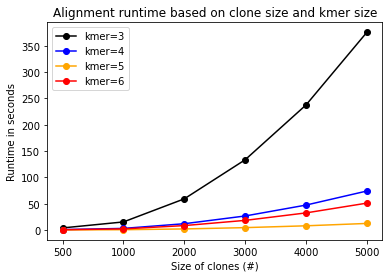

In [144]:
plt.plot(kmer3_size.time_s, marker = 'o', color = 'black', label = 'kmer=3')
plt.plot(kmer4_size.time_s, marker = 'o', color = 'blue', label = 'kmer=4')
plt.plot(kmer5_size.time_s, marker = 'o', color = 'orange', label = 'kmer=5')
plt.plot(kmer6_size.time_s, marker = 'o', color = 'red', label = 'kmer=6')
plt.legend()
plt.xlabel('Size of clones (#)')
plt.ylabel('Runtime in seconds')
plt.title('Alignment runtime based on clone size and kmer size')
plt.xticks([0,1,2,3,4,5], labels=[500,1000,2000,3000,4000,5000])
#plt.savefig('./size_variation+kmersize.png', bbox_inches='tight')